In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

### lets do some Exploratory Analysis

### read the credit risk data

In [4]:
# read in the data
credit_risk_train = pd.read_csv('application_train.csv')
credit_risk_test = pd.read_csv('application_test.csv')

In [5]:
credit_risk_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [6]:
credit_risk_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [7]:
credit_risk_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


### check for the list of different datatypes

In [8]:
categorical = [var for var in credit_risk_train.columns if credit_risk_train[var].dtype == 'O']

year_vars = [var for var in credit_risk_train.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in credit_risk_train.columns if credit_risk_train[var].dtype != 'O'
    and len(credit_risk_train[var].unique()) < 20] 

numerical = [
    var for var in credit_risk_train.columns if credit_risk_train[var].dtype != 'O'
    if var not in discrete and var not in ['SK_ID_CURR', 'TARGET']
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
#print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 62 continuous variables
There are 43 discrete variables
There are 16 categorical variables


In [40]:
new_numerical = numerical = [
    var for var in credit_risk_train.columns if credit_risk_train[var].dtype != 'O'
    and var not in ['SK_ID_CURR', 'TARGET']
]

In [42]:
list(new_numerical) 

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXP

In [39]:
credit_risk_train[discrete].isnull().sum()

TARGET                             0
CNT_CHILDREN                       0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
F

### Examine the distribution of the target column

In [9]:
credit_risk_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


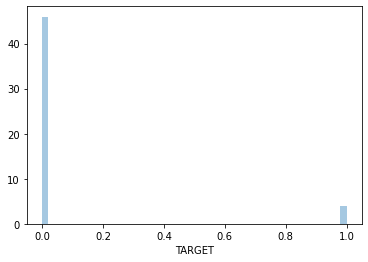

In [10]:
sns.distplot(credit_risk_train['TARGET'])

In [11]:
import os
file_path = os.path.join('data/faces/','data/faces/face_landmarks.csv')
print(file_path)

data/faces/data/faces/face_landmarks.csv


### get the list of missing values

In [12]:
vars_with_na = [var for var in credit_risk_train.columns if credit_risk_train[var].isnull().mean() > 0]

In [13]:
# let's find out whether they are numerical or categorical
credit_risk_train[vars_with_na].dtypes

AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
OWN_CAR_AGE                   float64
OCCUPATION_TYPE                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 67, dtype: object

In [14]:
credit_risk_train[vars_with_na].head(10)

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,27517.5,454500.0,"Spouse, partner",NaN,Laborers,2.0,NaN,0.354225,0.621226,NaN,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,41301.0,1395000.0,Unaccompanied,17.0,Accountants,3.0,0.774761,0.724000,0.492060,NaN,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,42075.0,1530000.0,Unaccompanied,8.0,Managers,2.0,NaN,0.714279,0.540654,NaN,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,33826.5,913500.0,Children,NaN,NaN,2.0,0.587334,0.205747,0.751724,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,20250.0,405000.0,Unaccompanied,NaN,Laborers,1.0,NaN,0.746644,NaN,NaN,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# let's find out the percentage of observations missing per variable

# calculate the percentage of missing 
# using the isnull() and mean() methods from pandas
credit_risk_train_na_percentage= credit_risk_train[vars_with_na].isnull().mean()*100


credit_risk_train_count = credit_risk_train[vars_with_na].isnull().sum()

# transform the array into a dataframe
credit_risk_train_na = pd.concat([credit_risk_train_count,credit_risk_train_na_percentage],axis = 1)

# add column names to the dataframe
credit_risk_train_na.columns = ['number of missing', 'na_percentage']

# order the dataframe according to percentage of na per variable
credit_risk_train_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
credit_risk_train_na.head()

,number of missing,na_percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963


## Check for complete case analysis: To see if the data is missing at random or not missing at random
Here we do a complete case analysis(CCA), WHY?
CCA helps us to check if the data we have is missing at random or not
if the original data differs too much from the CCA data this will create a bais with the dataset
Observations will be missing if the data is not missing at random
When using our model in production our model will not know how to handle missing values



In [16]:
#capture variables with no or less than 5 NA
vars_cca = [var for var in credit_risk_train.columns if credit_risk_train[var].isnull().mean() < 0.05]

In [17]:
# calculate percentage of observations with complete
# cases: i.e., with values for all the variables

# the method dropna(), discards the observations that contain
# na in any of the rows / columns
len(credit_risk_train[vars_cca].dropna()) / len(credit_risk_train)

0.9903092897489846

In [18]:
credit_risk_train_cca = credit_risk_train[vars_cca].dropna()
credit_risk_train.shape, credit_risk_train_cca.shape

((307511, 122), (304531, 65))

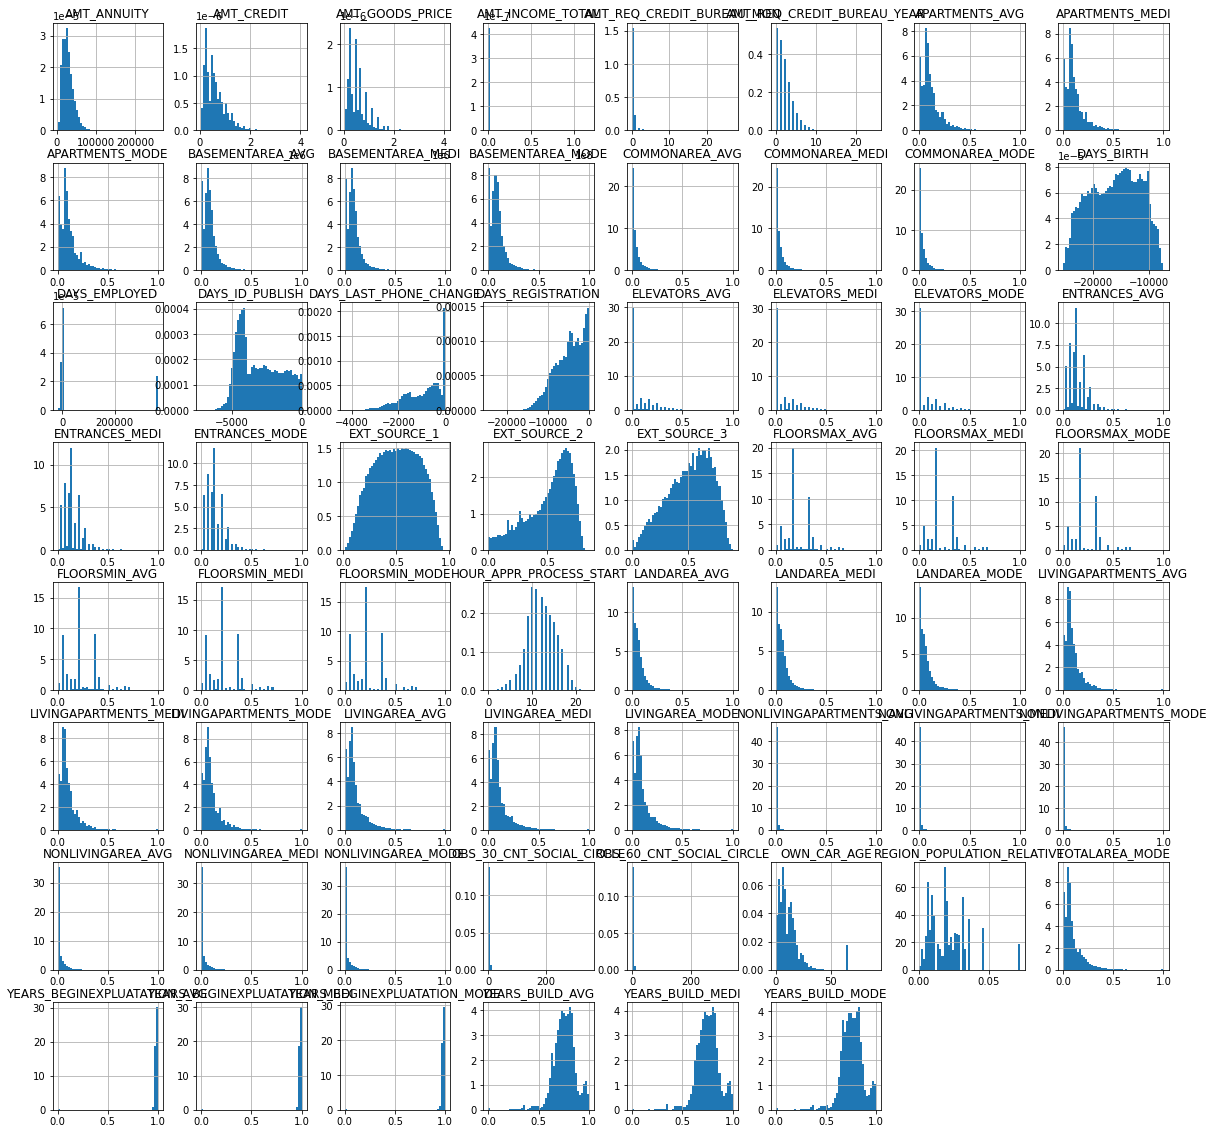

In [19]:
credit_risk_train[numerical].hist(bins=50, density=True, figsize=(20, 20))
plt.show()

In [20]:

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

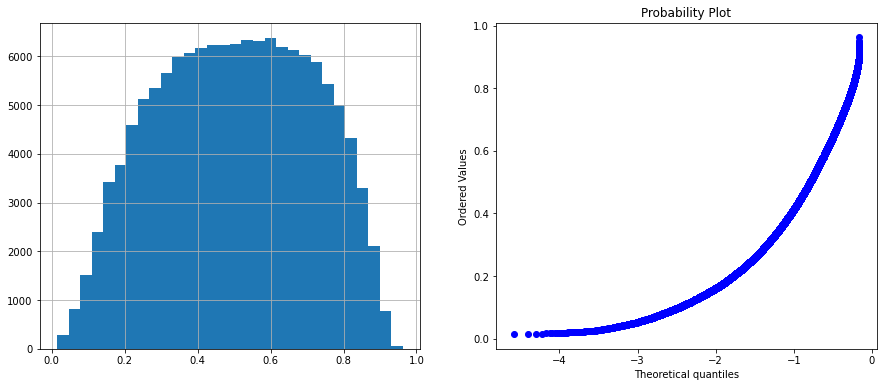

In [21]:
diagnostic_plots(credit_risk_train,'EXT_SOURCE_1')

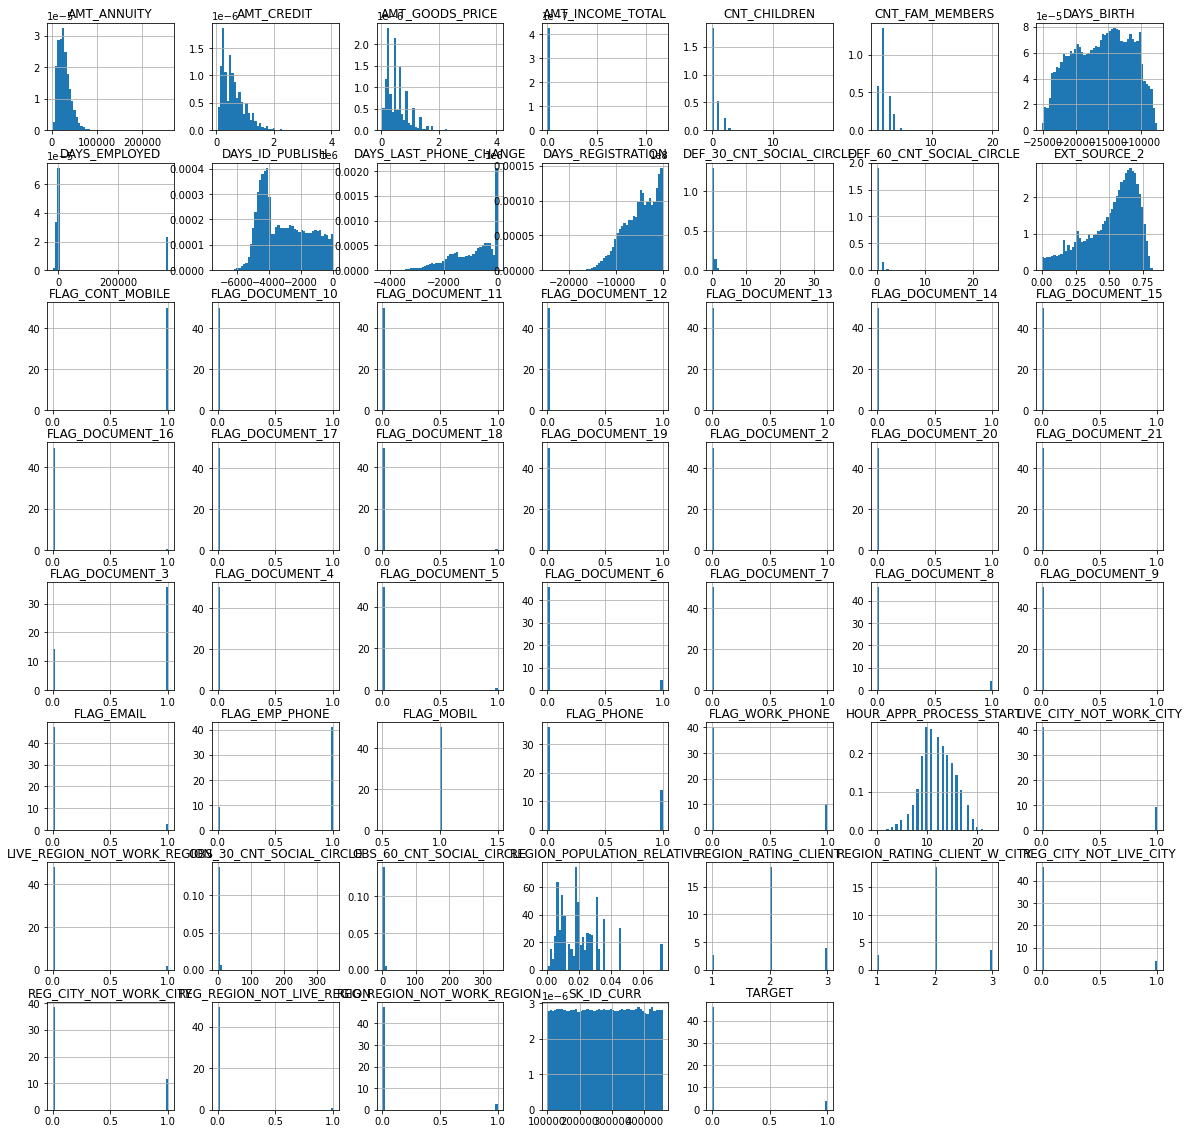

In [22]:
# we check thre distribution of variables in cca 
credit_risk_train_cca.hist(bins=50, density=True, figsize=(20, 20))
plt.show()

### there is not much difference between the data distribution of AMT_CREDIT of the original data and for the cca data

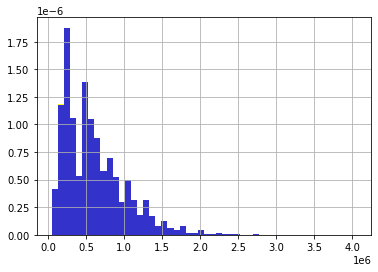

In [23]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
credit_risk_train['AMT_CREDIT'].hist(bins=50, ax=ax, density=True, color='yellow')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
credit_risk_train_cca['AMT_CREDIT'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

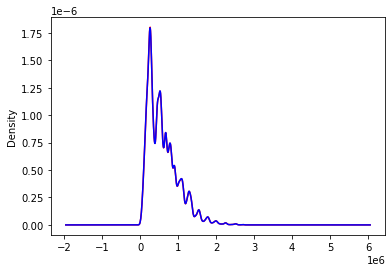

In [24]:
## let's check the distribution of a few variables before and after 
# cca: density plot for better visual understanding
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
credit_risk_train['AMT_CREDIT'].plot.density(color = 'red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
credit_risk_train_cca['AMT_CREDIT'].plot.density(color = 'blue')

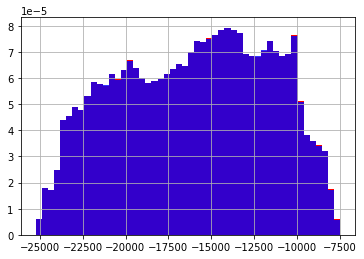

In [25]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
credit_risk_train['DAYS_BIRTH'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
credit_risk_train_cca['DAYS_BIRTH'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

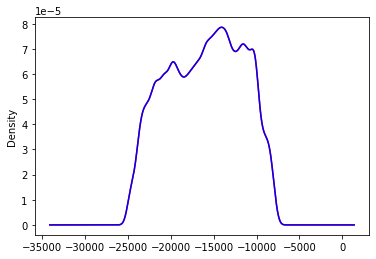

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

credit_risk_train['DAYS_BIRTH'].plot.density(color = 'red')

credit_risk_train_cca['DAYS_BIRTH'].plot.density(color = 'blue')

In [27]:
def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [28]:
 categorical_distribution(credit_risk_train,credit_risk_train_cca,'FLAG_OWN_CAR')

,original,cca
N,0.659892,0.659736
Y,0.340108,0.340264


In [29]:
categorical_distribution(credit_risk_train,credit_risk_train_cca,'NAME_EDUCATION_TYPE')

,original,cca
Secondary / secondary special,0.710189,0.711199
Higher education,0.243448,0.242409
Incomplete higher,0.033420,0.033412
Lower secondary,0.012409,0.012445
Academic degree,0.000533,0.000535


#### determining cardinality

In [30]:
categorical_df = credit_risk_train[categorical]

In [31]:
categorical_df.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [32]:
categorical_df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

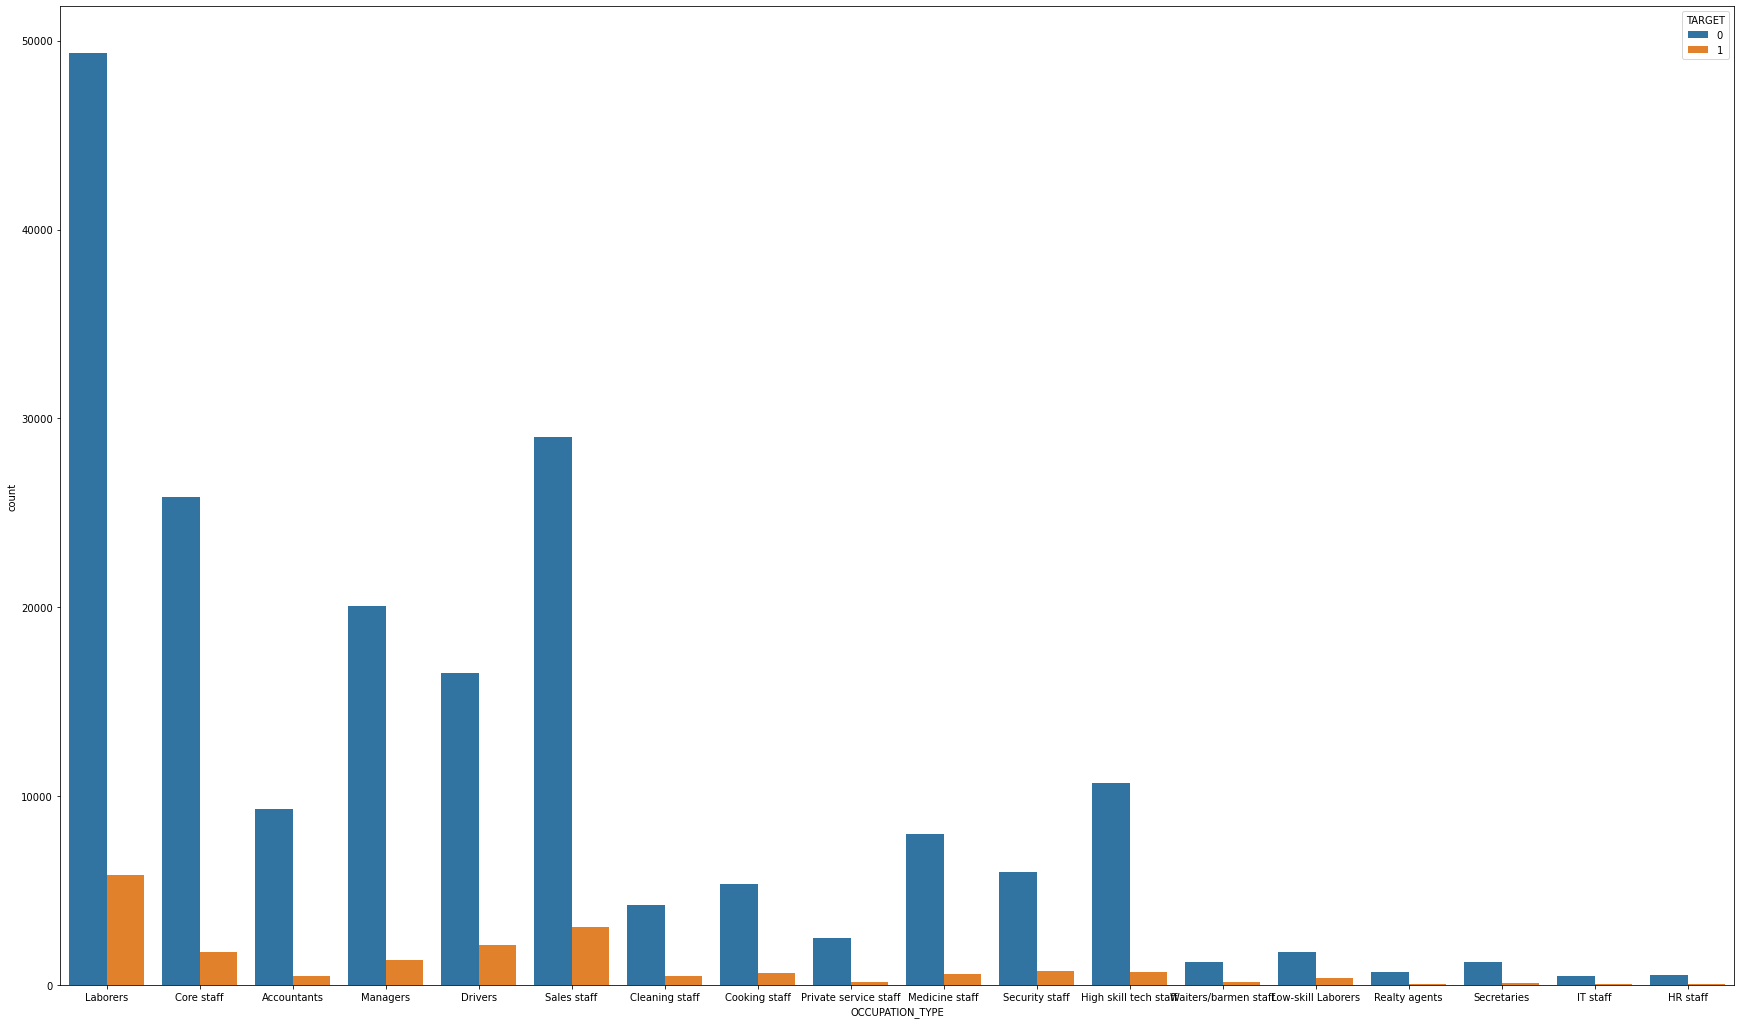

In [33]:
plt.figure(figsize=(30,18))
sns.countplot(x='OCCUPATION_TYPE',data = credit_risk_train,hue = 'TARGET')

Text(0.5, 1.0, 'cardinality')

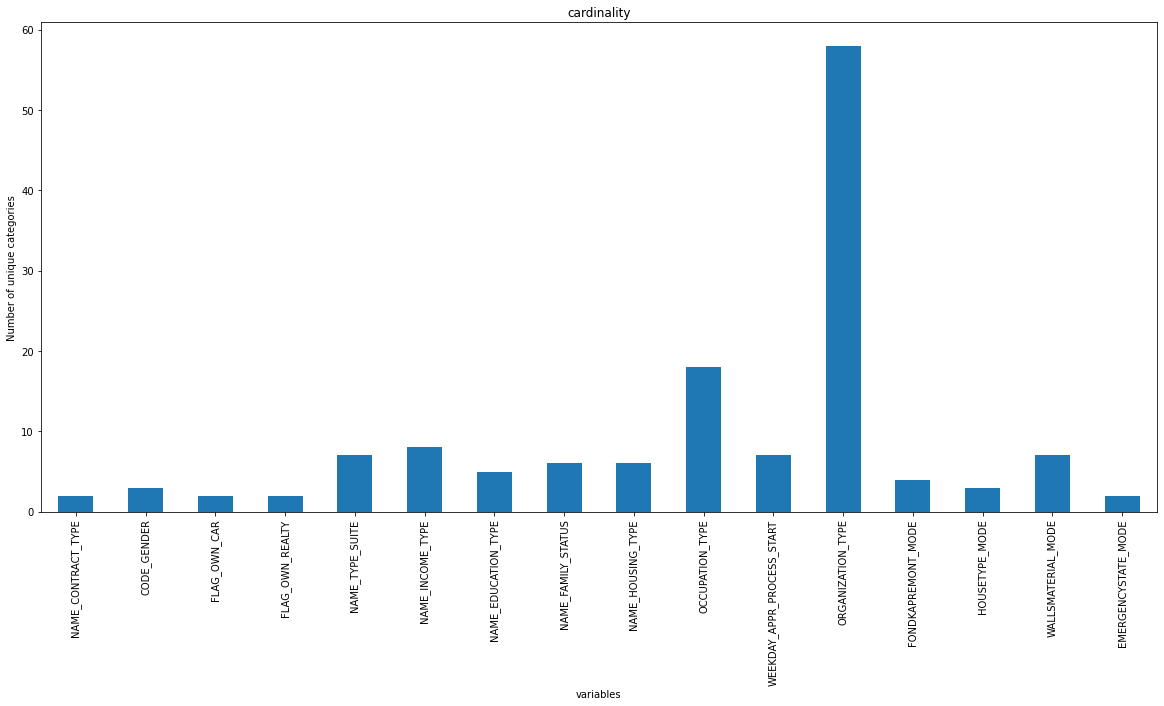

In [34]:
categorical_df.nunique().plot.bar(figsize = (20,9))
plt.ylabel('Number of unique categories')
plt.xlabel('variables')
plt.title('cardinality')

#### Rare Labels

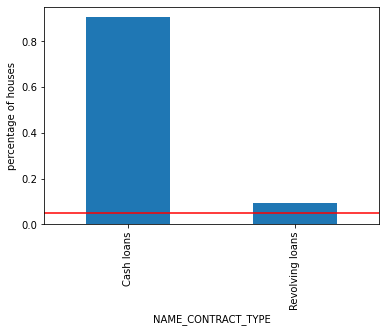

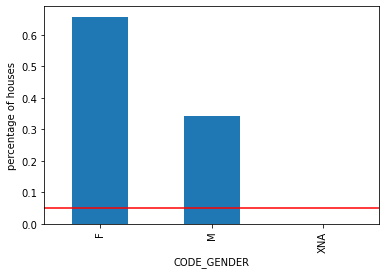

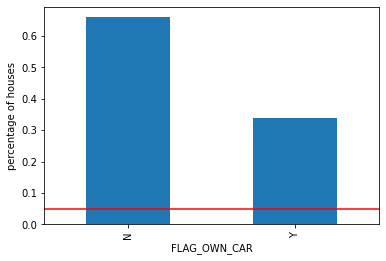

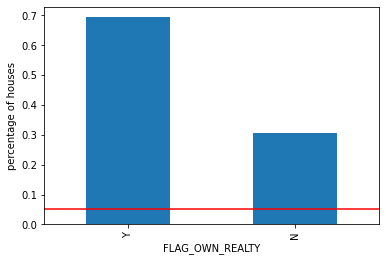

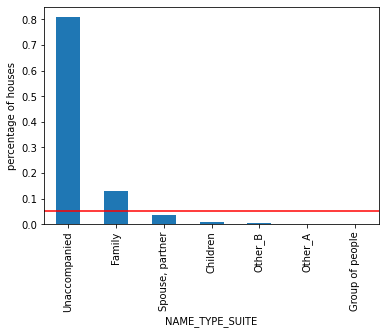

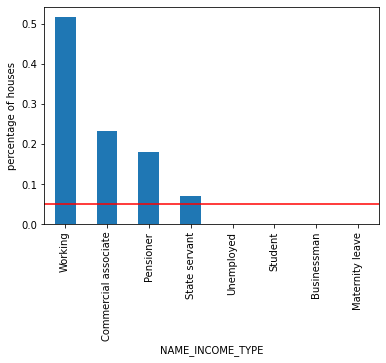

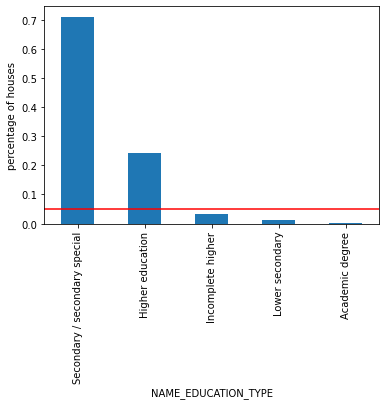

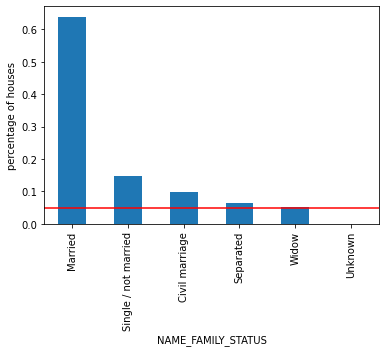

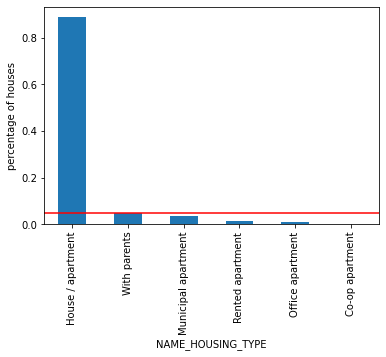

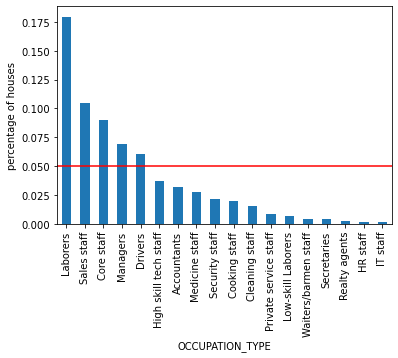

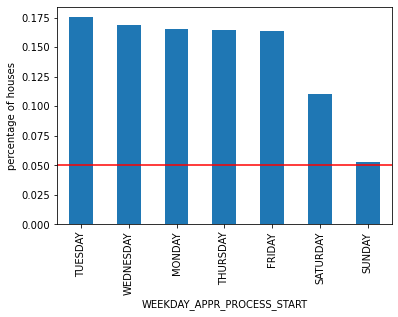

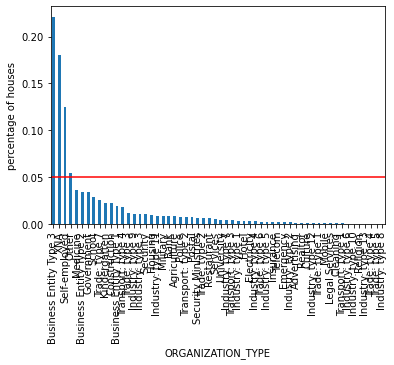

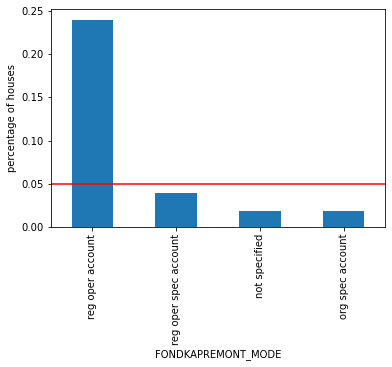

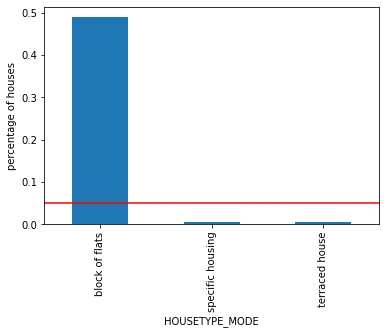

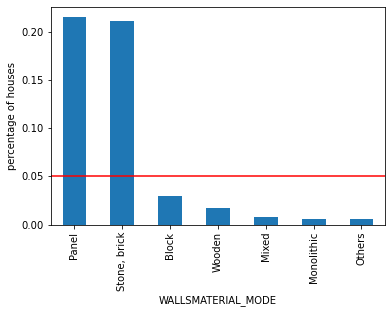

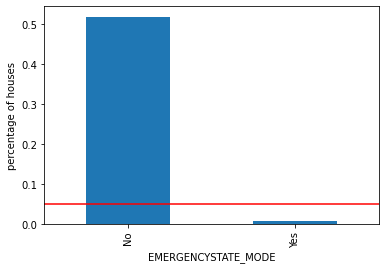

In [35]:
total_counts = len(categorical_df)

for col in categorical_df.columns:
    
    cat_df = pd.Series(categorical_df[col].value_counts()/total_counts)
    
    fig = cat_df.sort_values(ascending = False).plot.bar()
    fig.set_xlabel(col)
    
    fig.axhline(y = 0.05,color = 'red')
    fig.set_ylabel('percentage of houses')
    plt.show()

In [36]:
train_labels = credit_risk_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = credit_risk_train.align(credit_risk_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


ValueError: num must be 1 <= num <= 10, not 11

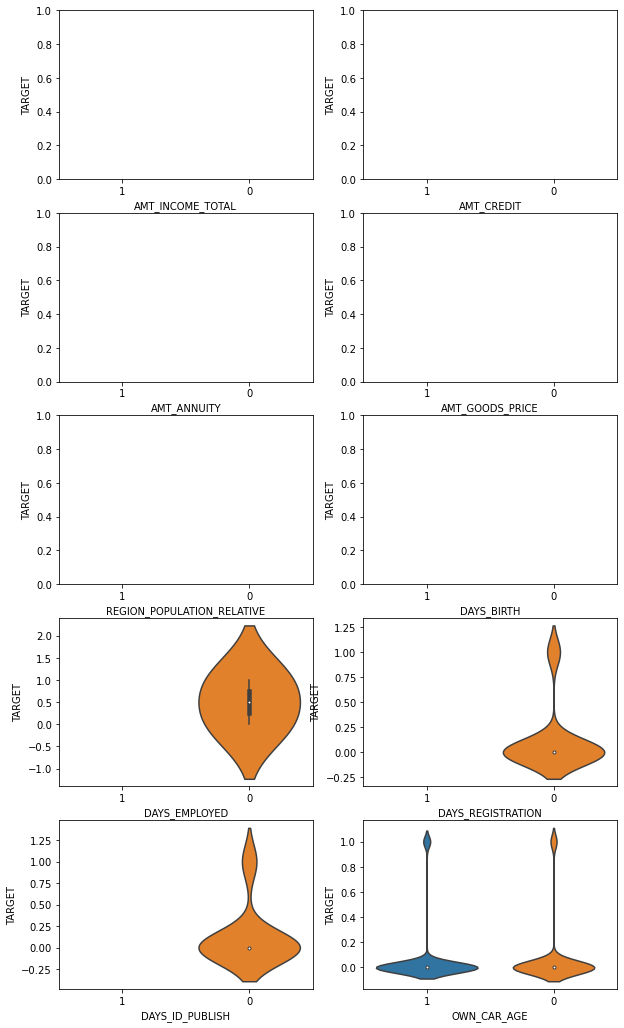

In [37]:
plt.figure(figsize=(10,18))
for index,col in enumerate(numerical):
    #if credit_risk_train[col].nunique() < 11:

    plt.subplot(5,2,index + 1)
    sns.violinplot(x = col, y= 'TARGET', data= credit_risk_train,order=[1,0])
   


In [69]:
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

ValueError: num must be 1 <= num <= 12, not 13

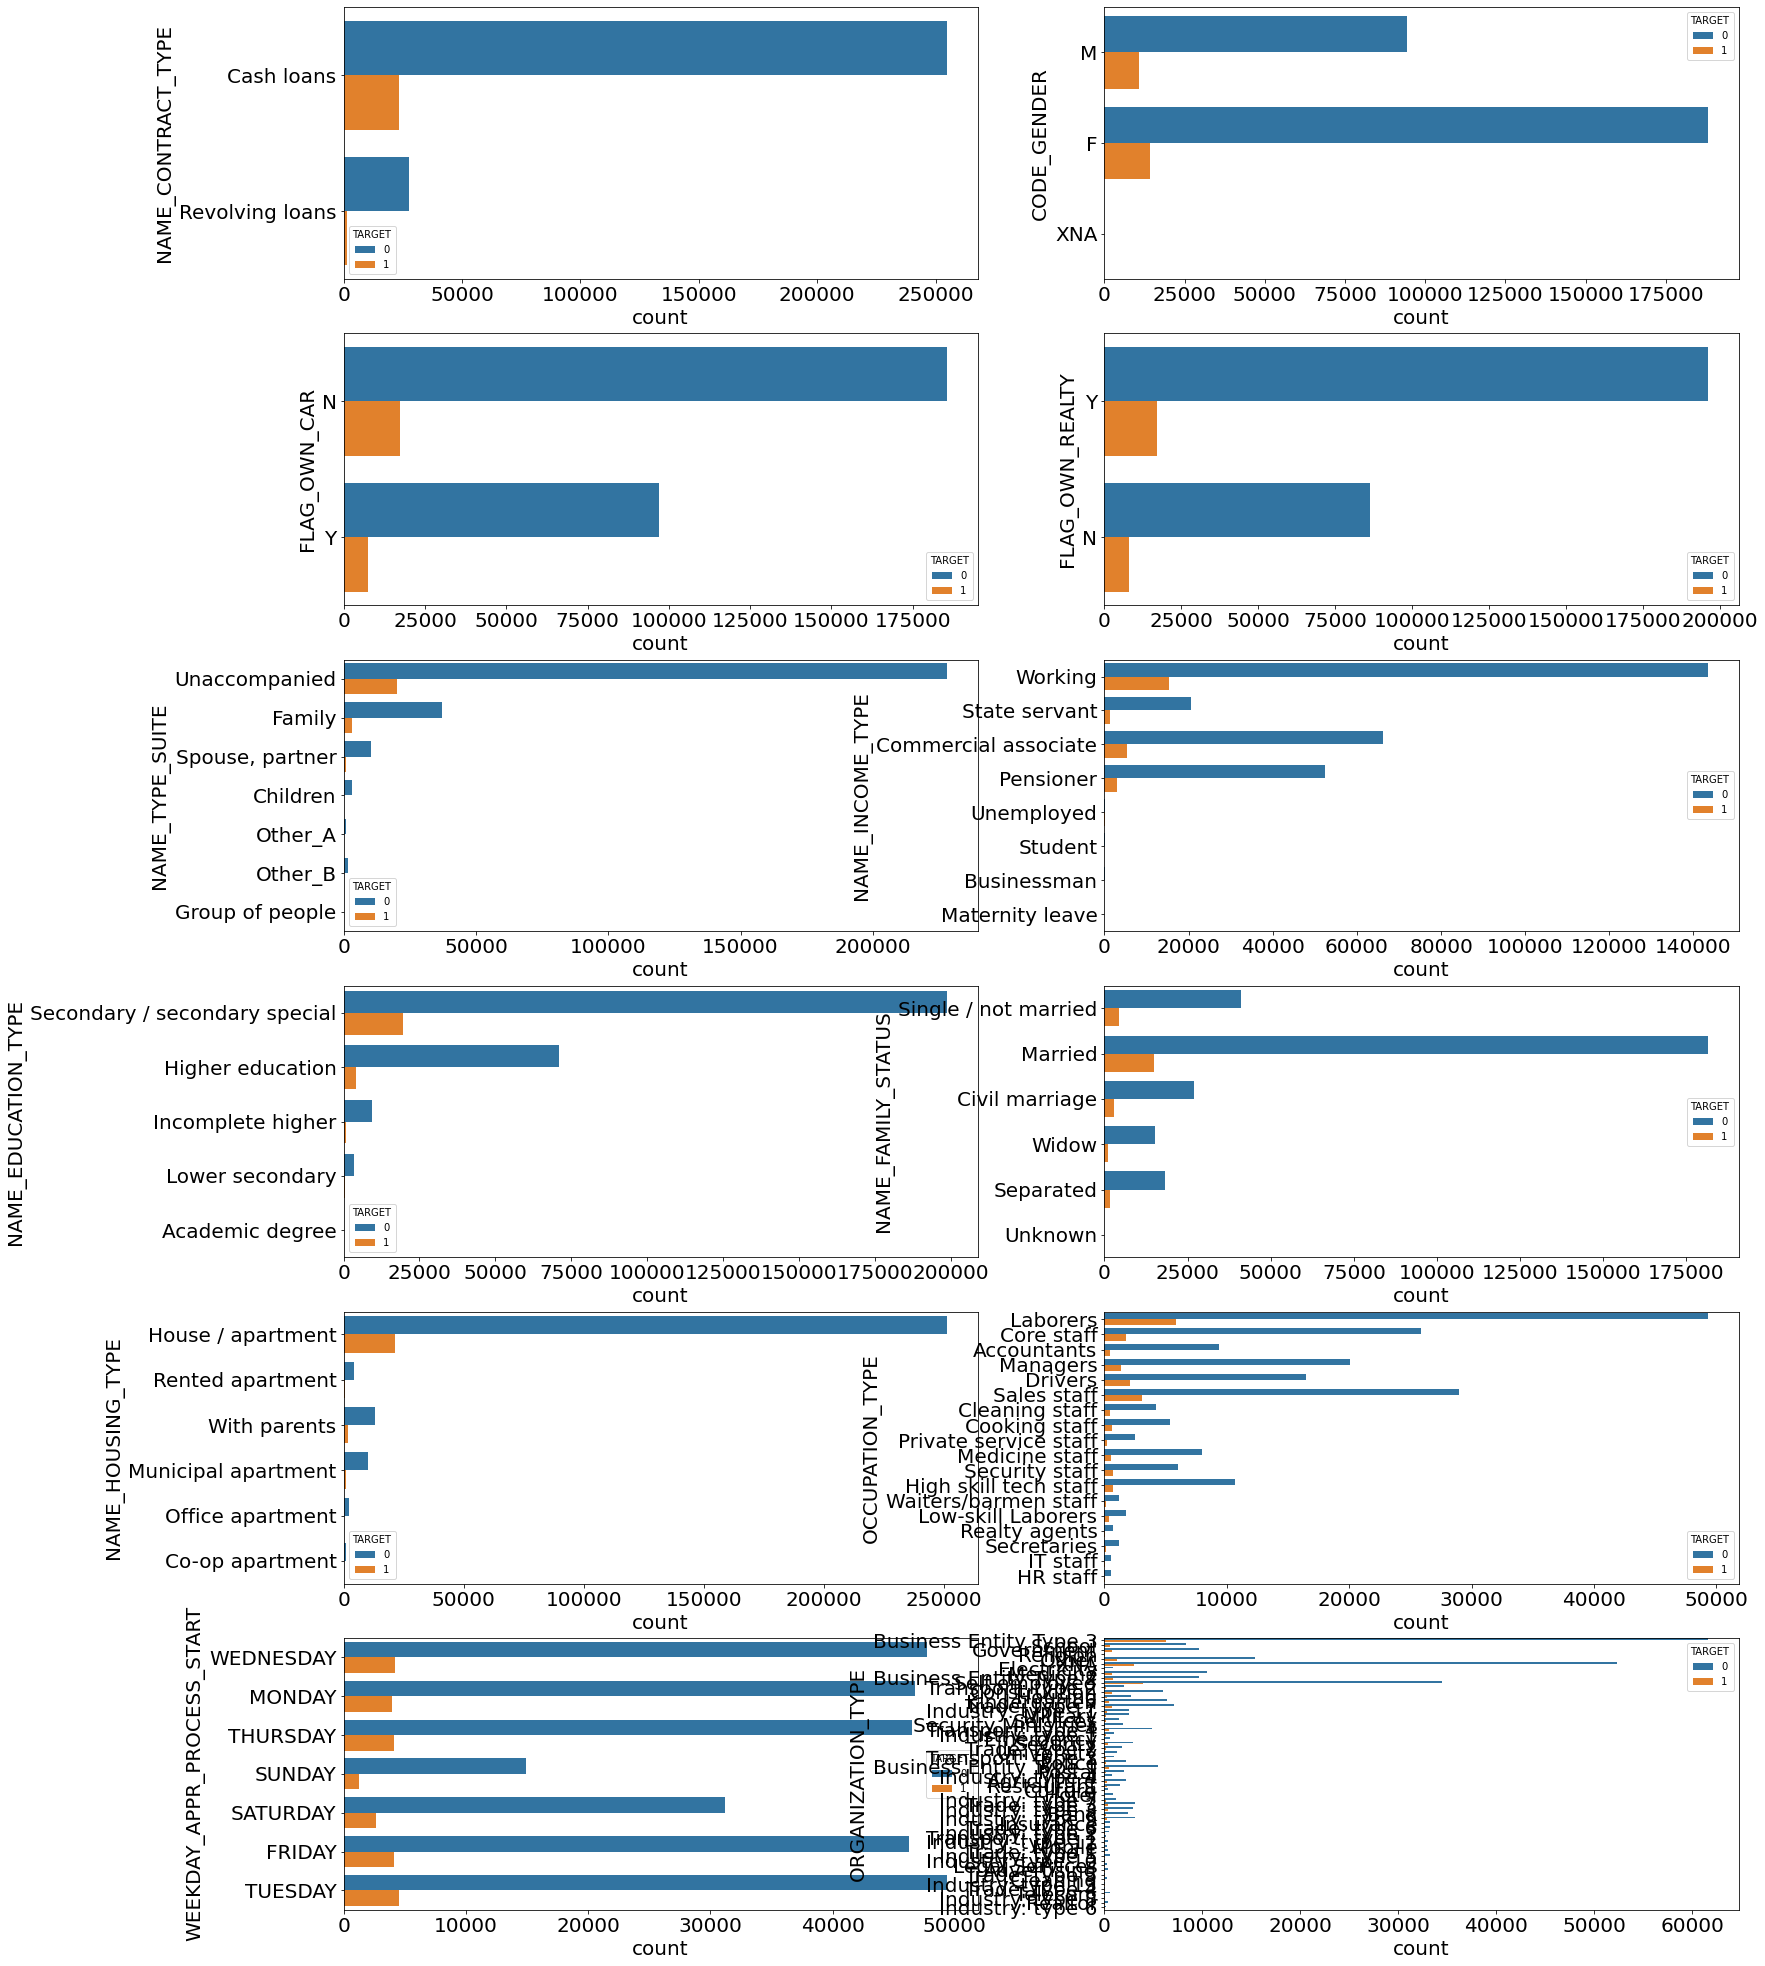

In [70]:
plt.figure(figsize=(25,35))
for index, column in enumerate(categorical):
    plt.subplot(6, 2, index + 1)
    ax = sns.countplot(y = column, data= credit_risk_train,hue='TARGET')
    ax.set_xlabel("count",fontsize = 20)
    ax.set_ylabel(column,fontsize = 20)
    ax.tick_params(labelsize = 20)

## Feature Engineering 

### Missing value imputation

First we check for categorical and numerical variables 
before determining the imputation method to be used

In [35]:
for col in numerical:
    if credit_risk_train[col].isnull().mean()>0:
        print(col,credit_risk_train[col].isnull().mean()>0)

AMT_ANNUITY True
AMT_GOODS_PRICE True
OWN_CAR_AGE True
EXT_SOURCE_1 True
EXT_SOURCE_2 True
EXT_SOURCE_3 True
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI True
YEARS_BEGINEXPLUATATION_MEDI True
YEARS_BUILD_MEDI True
COMMONAREA_MEDI True
ELEVATORS_MEDI True
ENTRANCES_MEDI True
FLOORSMAX_MEDI True
FLOORSMIN_MEDI True
LANDAREA_MEDI True
LIVINGAPARTMENTS_MEDI True
LIVINGAREA_MED

In [2]:
credit_risk_train[numerical]

NameError: name 'credit_risk_train' is not defined

In [37]:
for col in categorical:
    if credit_risk_train[col].isnull().mean()>0:
        print(col,credit_risk_train[col].isnull().mean())


NAME_TYPE_SUITE 0.004201475719567756
OCCUPATION_TYPE 0.31345545362604915
FONDKAPREMONT_MODE 0.6838617155158677
HOUSETYPE_MODE 0.50176091261776
WALLSMATERIAL_MODE 0.508407829313423
EMERGENCYSTATE_MODE 0.47398304450897694


In [42]:
list(categorical)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
for col in categorical:
    if credit_risk_train[col].isnull().mean()>0:
        print(col,credit_risk_train[col].isnull().mean())

In [40]:
for col in categorical:
    print(credit_risk_train[col].isnull().mean()>0)

False
False
False
False
True
False
False
False
False
True
False
False
True
True
True
True


In [64]:
import pandas as pd
#import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from yellowbrick.model_selection import FeatureImportances


def run(fold):
    df = pd.read_csv('train_fold.csv')
    ##get numerical variables
    num_cols = [col for col in df.columns if df[col].dtypes!= 'O']

    #print(num_cols)
    
    ## get the all the features in the data
    features = [feat for feat in df.columns if feat not in ('kfold','TARGET','SK_ID_CURR')]

 
    ## fill in missing numerical features
    ## first iterate thr all features, then for cat feats in all features fill na with string 'missing'
    for col in num_cols:
        df.loc[:,col] = df[col].fillna(0)

    for col in features:
        if col not in num_cols:
            df.loc[:,col] = df[col].astype(str).fillna('missing')
    
    ### encode categorical variable
    for col in features:
        if col not in num_cols:
            label_enc = preprocessing.LabelEncoder()
            label_enc.fit(df[col])

            df.loc[:,col] = label_enc.transform(df[col])

    df_train = df[df.kfold != fold].reset_index(drop = True)

    df_valid  =df[df.kfold == fold].reset_index(drop = True)

    x_train = df_train[features].values

    x_valid = df_valid[features].values

    model =  RandomForestClassifier()

    model.fit(x_train,df_train.TARGET.values)

    valid_preds = model.predict_proba(x_valid)[:,1]

    auc = metrics.roc_auc_score(df_valid.TARGET.values,valid_preds)
    
    plt.figure(figsize = (30,20))
    importance = model.feature_importances_
    idxs = np.argsort(importance)
    plt.title('Feature Importance')
    plt.barh(range(len(idxs)),importance[idxs],align = 'center')
    plt.yticks(range(len(idxs)),[features[i] for i in idxs])
    plt.xlabel('Random forest feature importance')
    plt.show()

    print(f'Fold = {fold},AUC = {auc}')
    
  



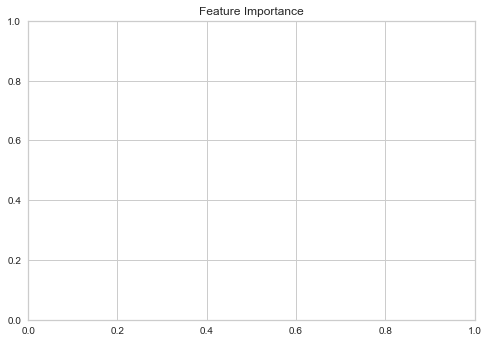

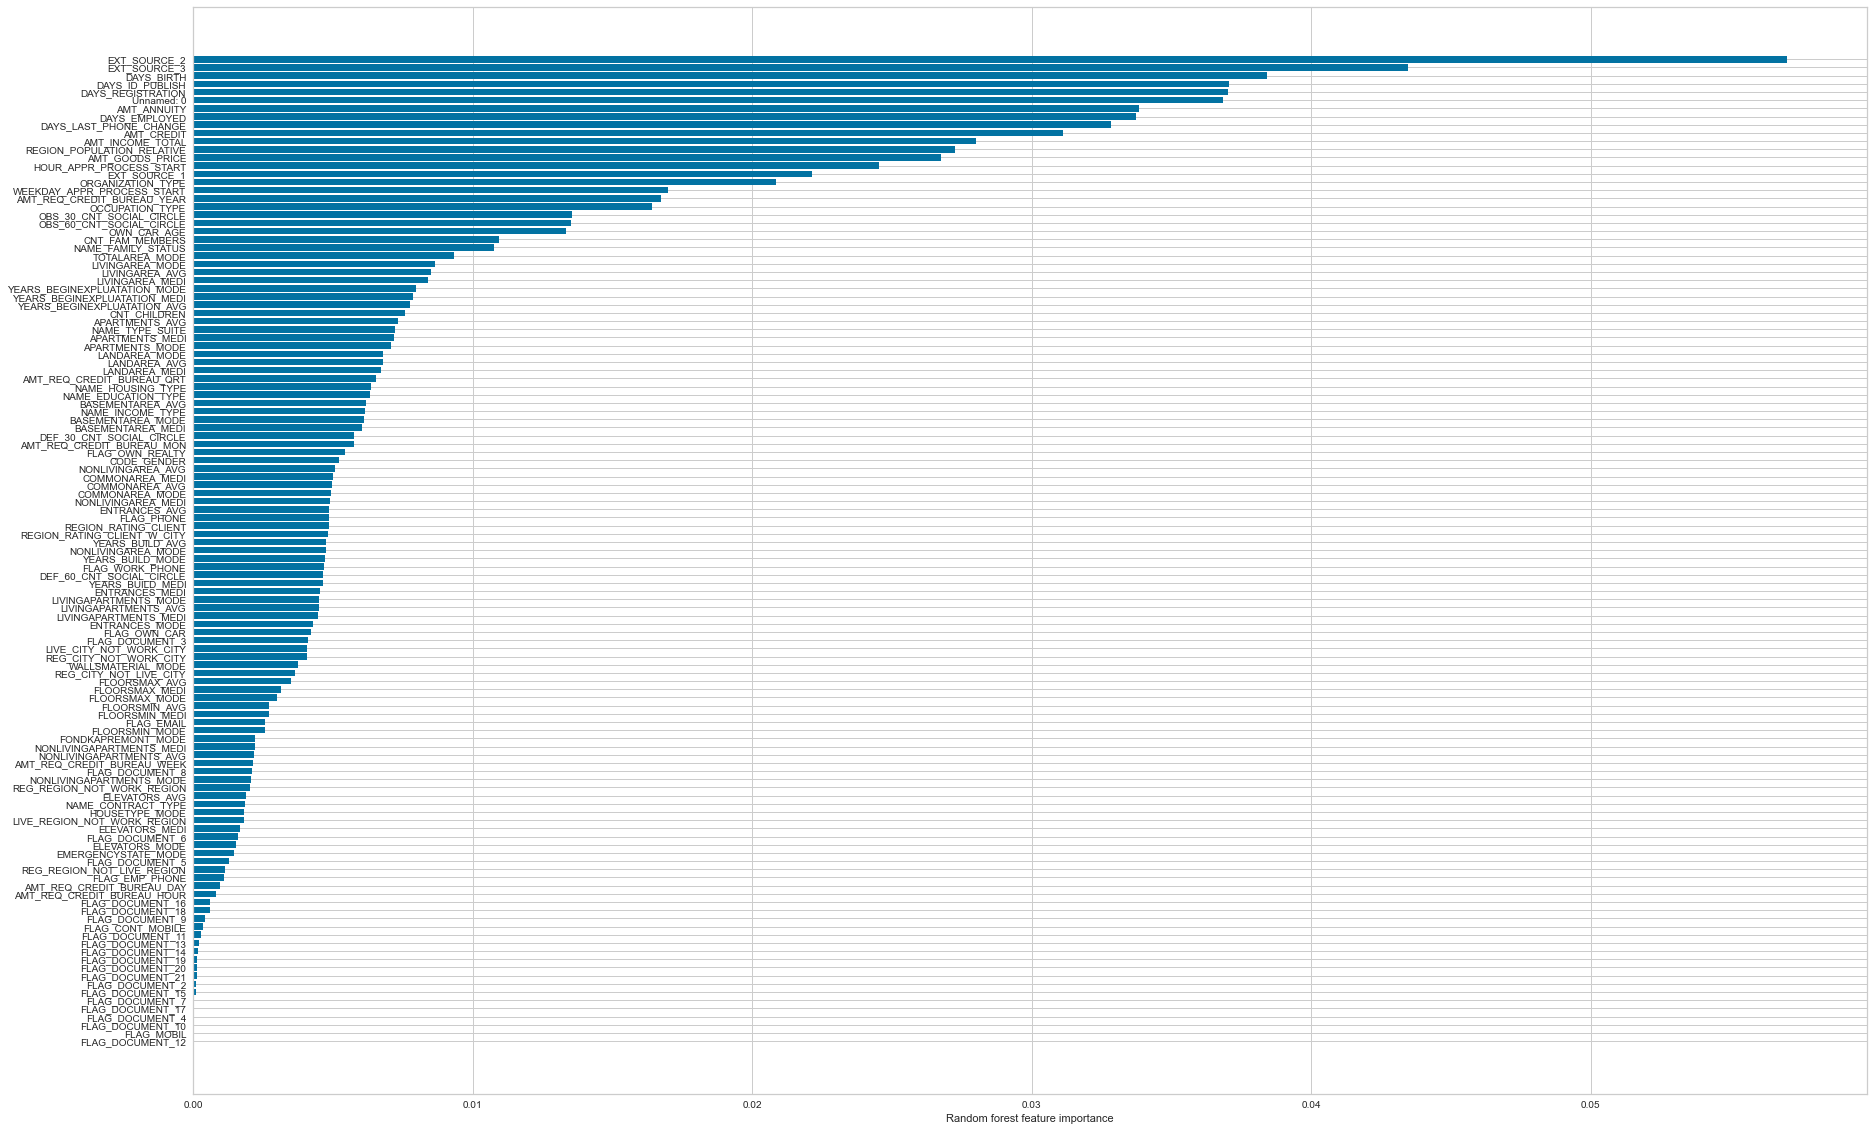

Fold = 0,AUC = 0.6445458102005702


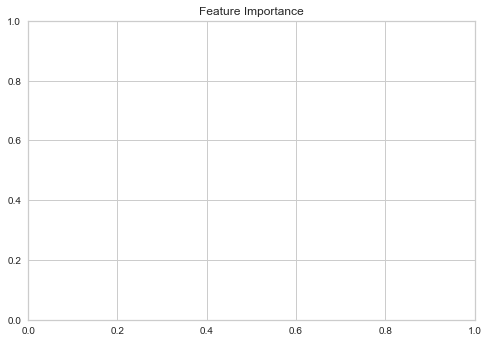

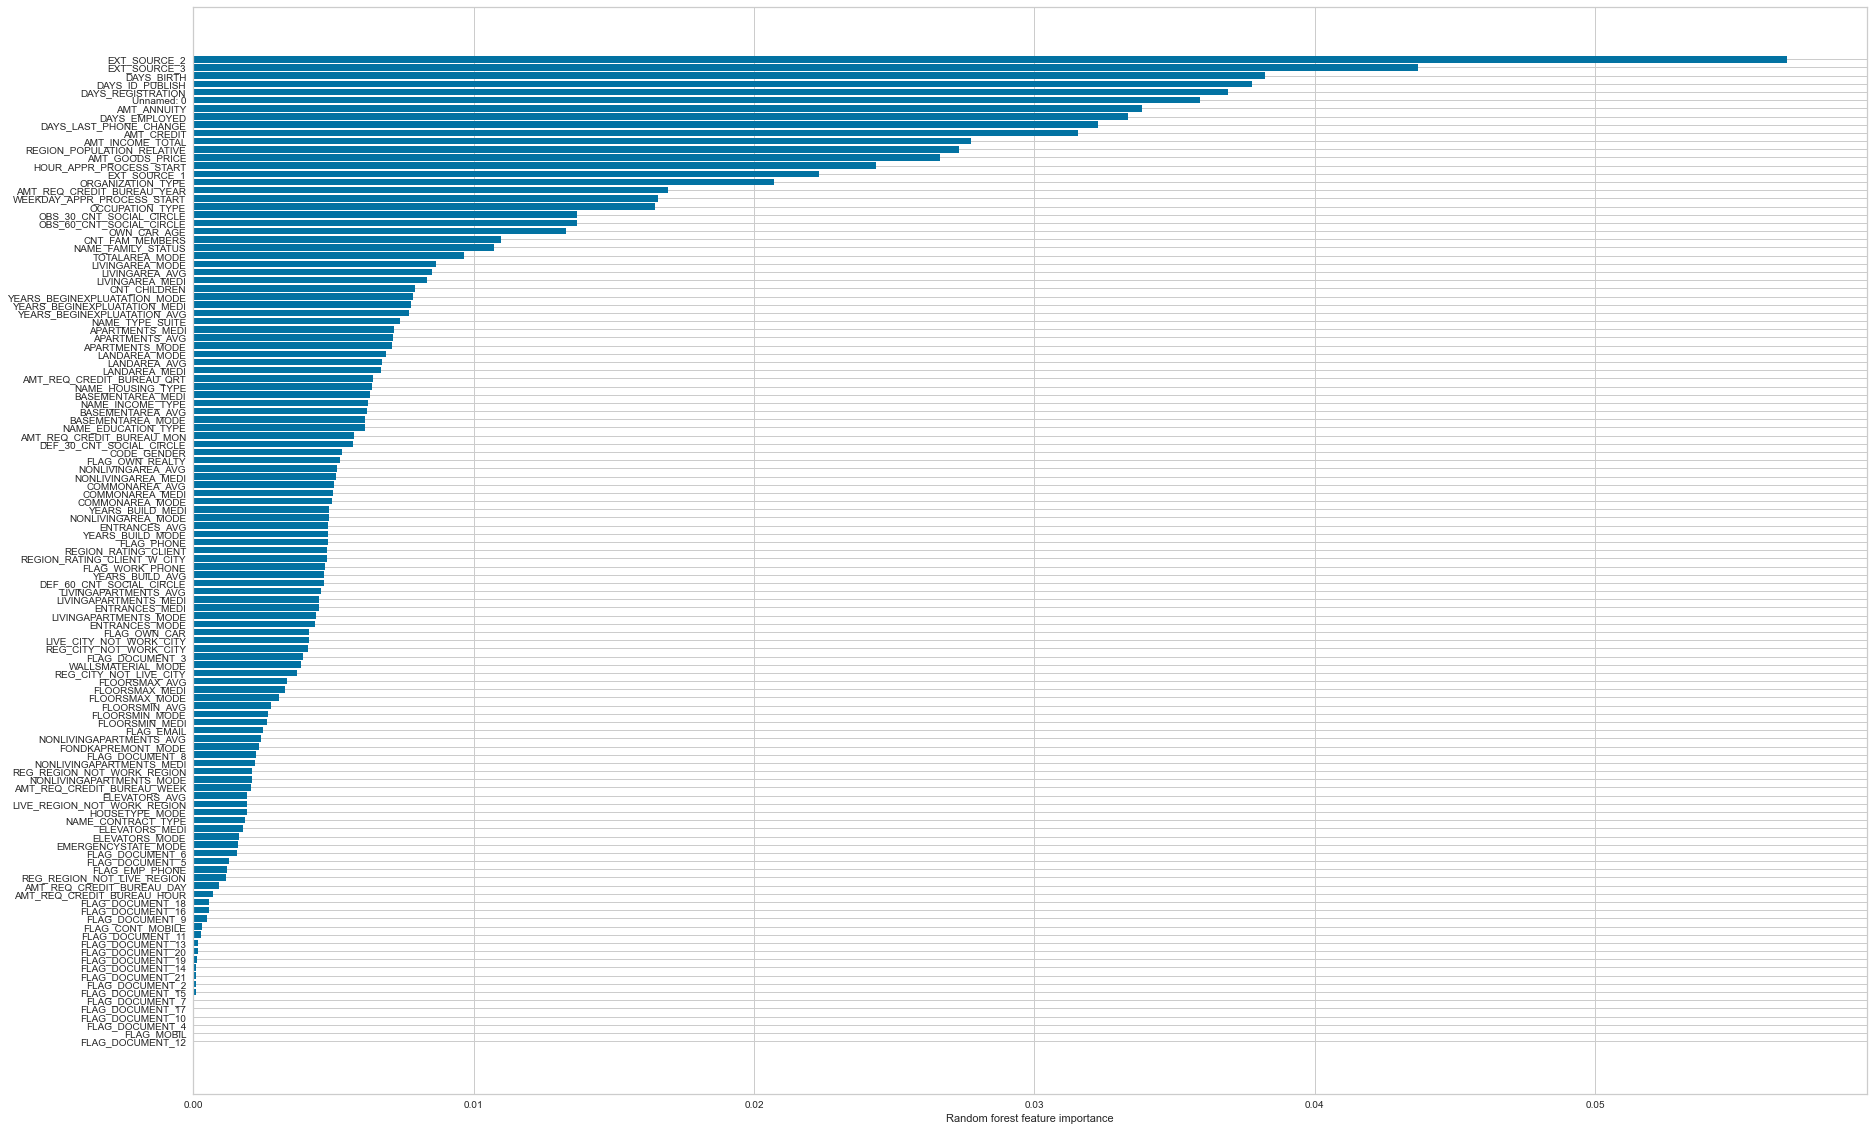

Fold = 1,AUC = 0.7068994484820882


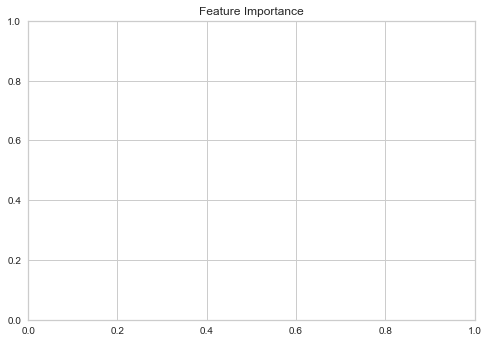

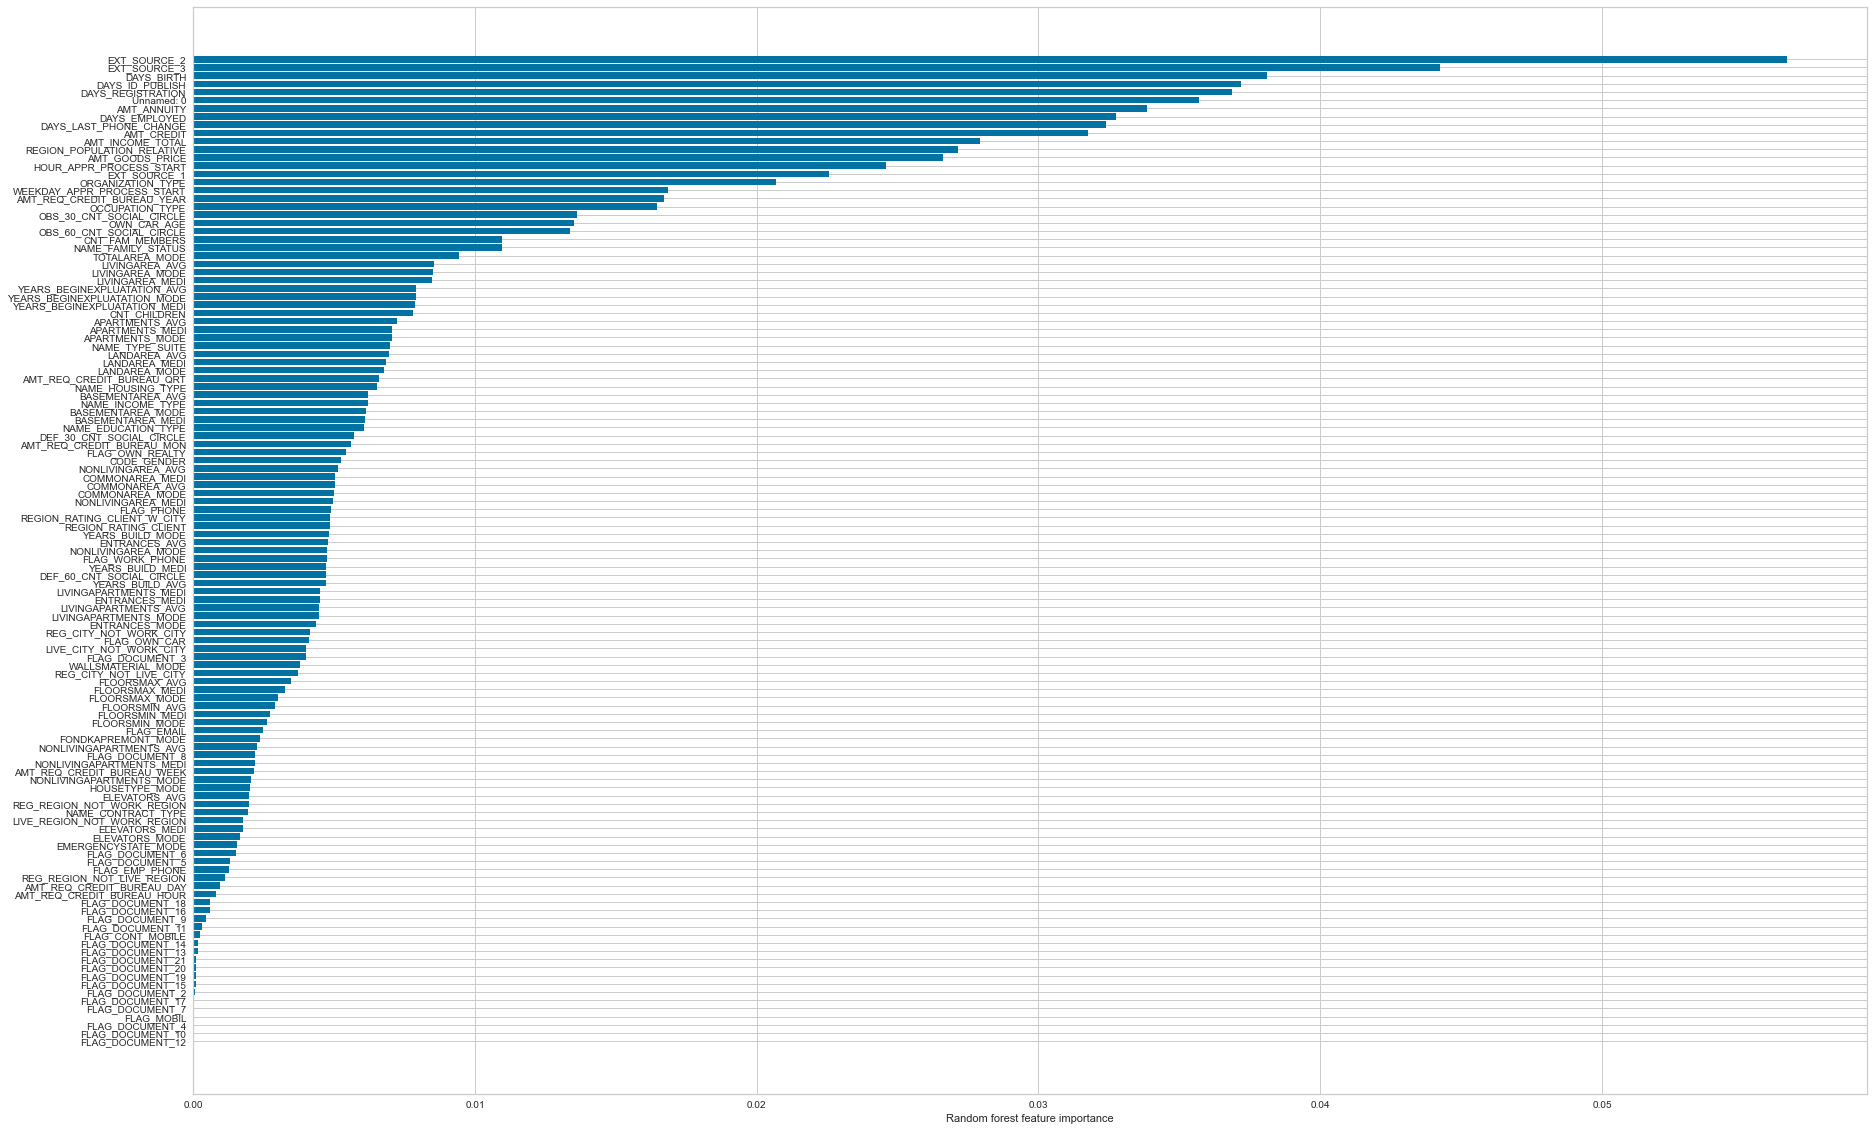

Fold = 2,AUC = 0.7063523230631827


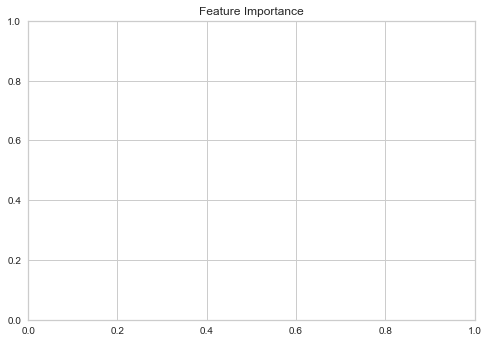

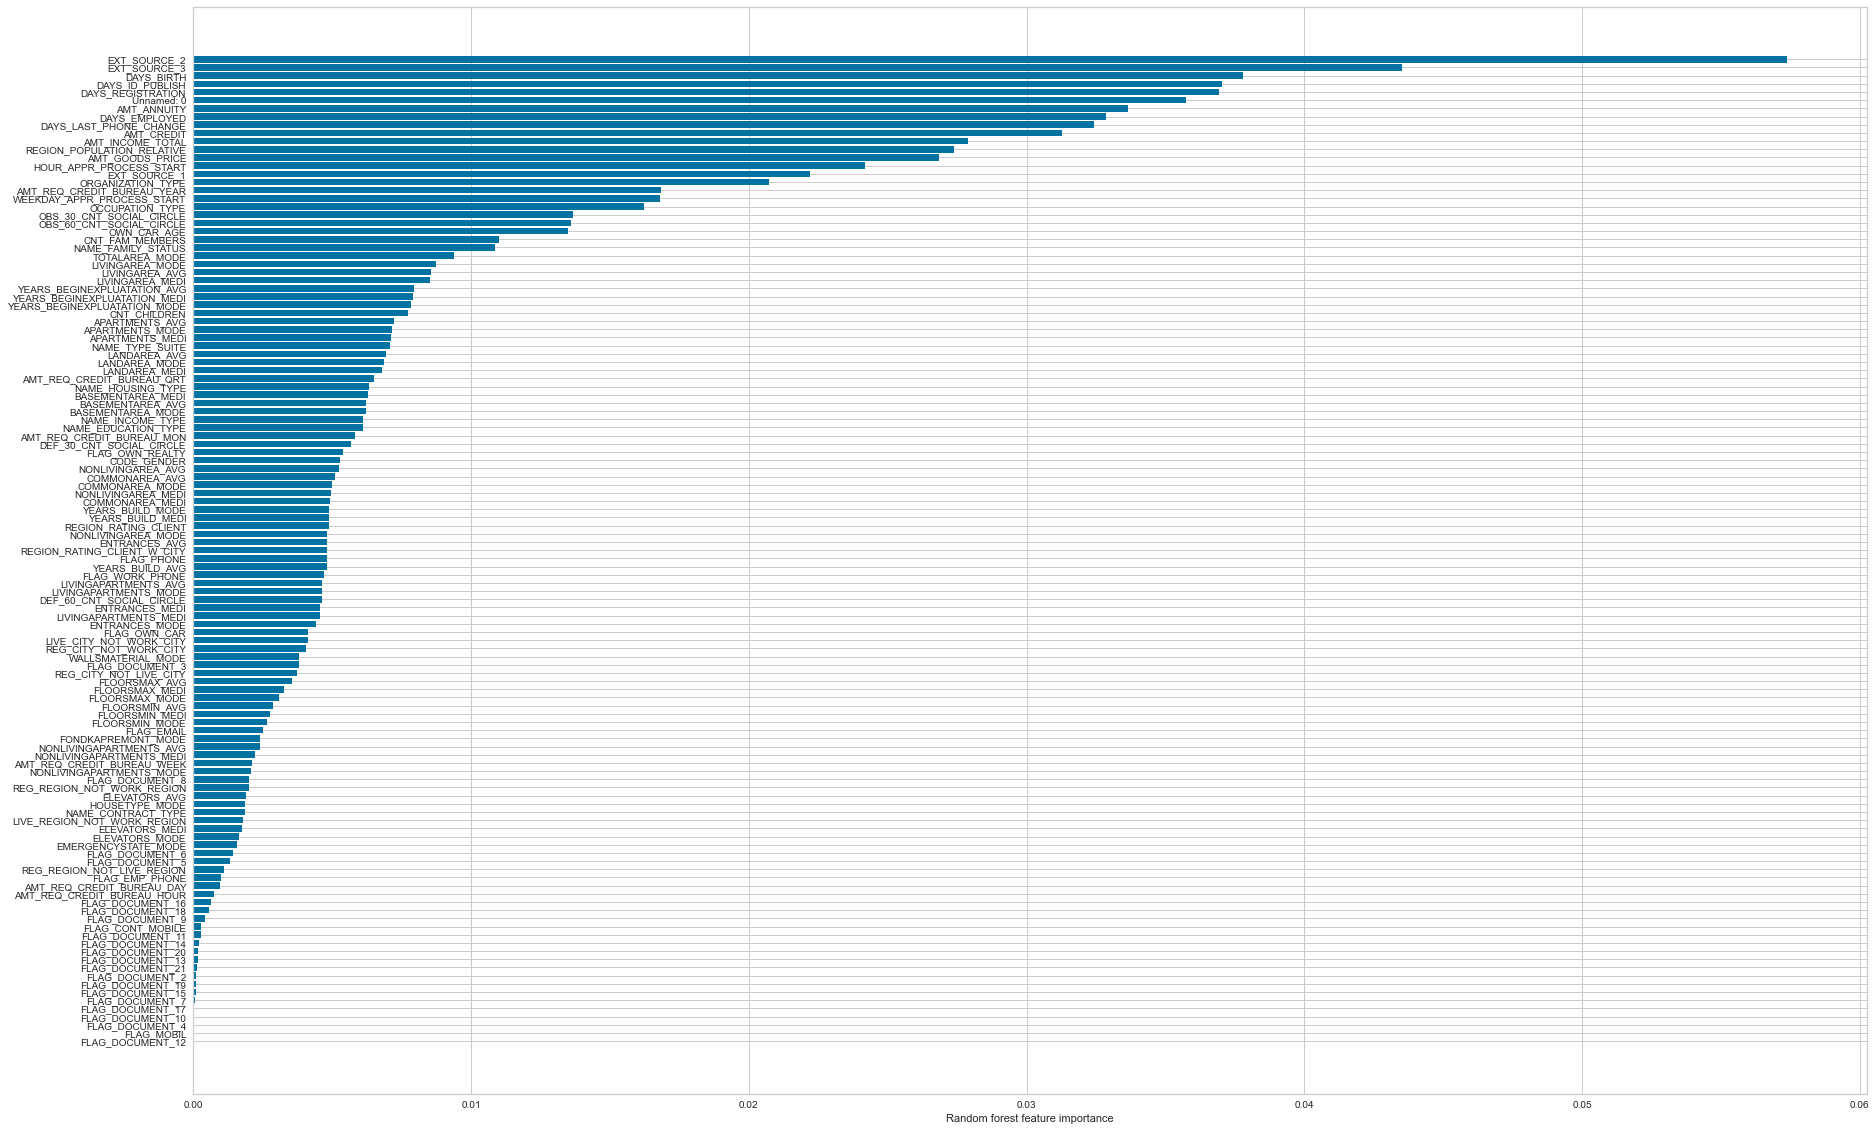

Fold = 3,AUC = 0.712776082024977


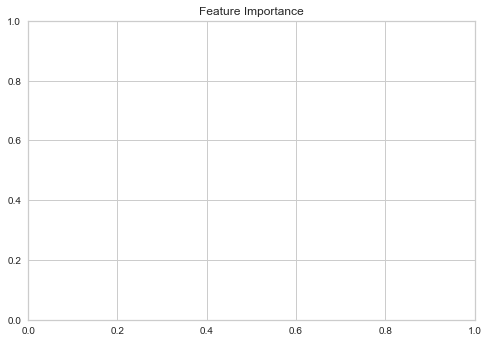

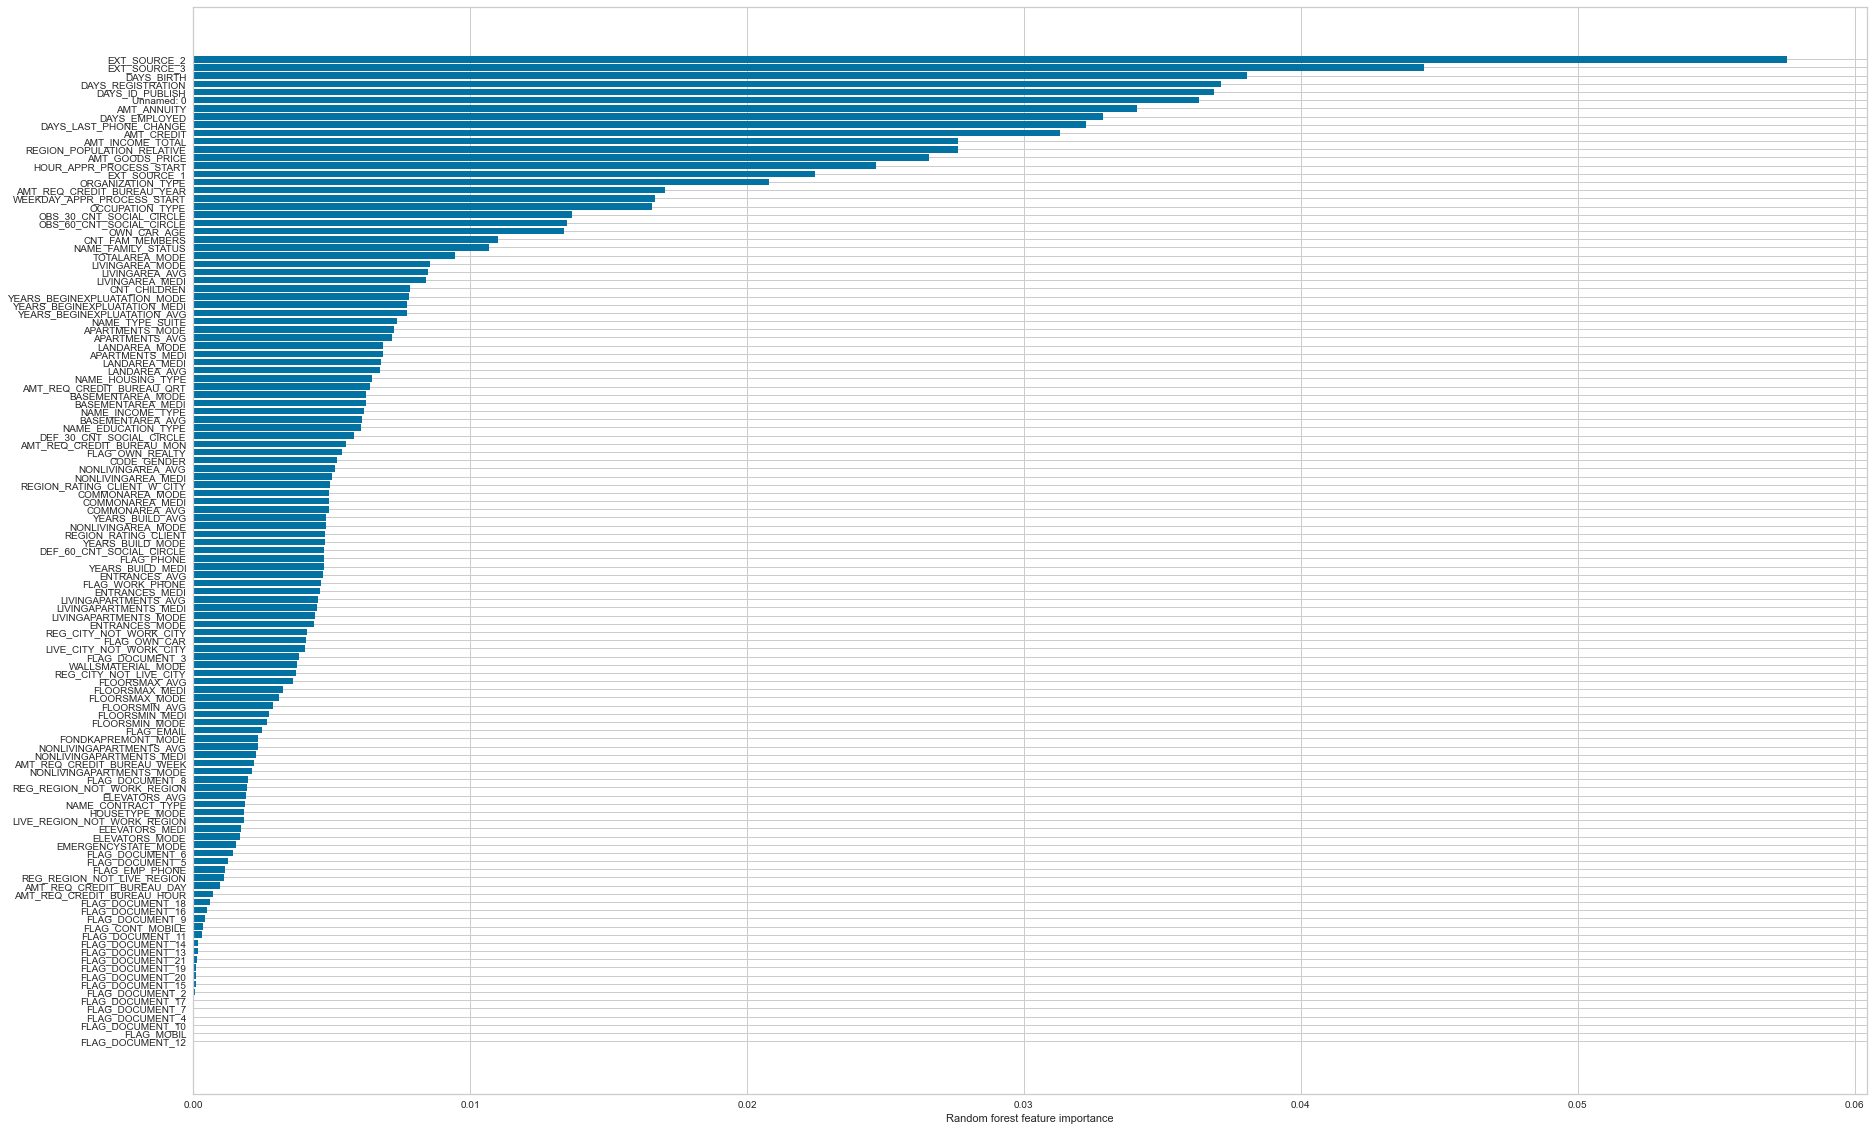

Fold = 4,AUC = 0.7047257558841636


In [65]:
for fold in range(5):
    run(fold)